# **Tasks**
**1. Load the dataset into a PySpark DataFrame and display the first 10 rows.**

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType
from datetime import date

spark = SparkSession.builder.appName("Graphs").getOrCreate()

In [6]:
schema = StructType([
    StructField("order_id", StringType()),
    StructField("region", StringType()),
    StructField("category", StringType()),
    StructField("quantity", IntegerType()),
    StructField("price", IntegerType()),
    StructField("order_date", DateType())
])


data = [
    ("O001", "South", "Electronics", 3, 15000, date(2025, 1, 5)),
    ("O002", "North", "Clothing", 5, 2000, date(2025, 1, 6)),
    ("O003", "East", "Furniture", 2, 12000, date(2025, 1, 7)),
    ("O004", "West", "Electronics", 1, 18000, date(2025, 1, 8)),
    ("O005", "North", "Furniture", 4, 9000, date(2025, 1, 10)),
    ("O006", "South", "Clothing", 6, 2500, date(2025, 1, 11)),
    ("O007", "East", "Electronics", 2, 17000, date(2025, 1, 12)),
    ("O008", "South", "Furniture", 5, 8500, date(2025, 1, 15)),
    ("O009", "West", "Clothing", 7, 3000, date(2025, 1, 17)),
    ("O010", "North", "Electronics", 4, 16000, date(2025, 1, 18))
]

df = spark.createDataFrame(data, schema)
df.show(10)

+--------+------+-----------+--------+-----+----------+
|order_id|region|   category|quantity|price|order_date|
+--------+------+-----------+--------+-----+----------+
|    O001| South|Electronics|       3|15000|2025-01-05|
|    O002| North|   Clothing|       5| 2000|2025-01-06|
|    O003|  East|  Furniture|       2|12000|2025-01-07|
|    O004|  West|Electronics|       1|18000|2025-01-08|
|    O005| North|  Furniture|       4| 9000|2025-01-10|
|    O006| South|   Clothing|       6| 2500|2025-01-11|
|    O007|  East|Electronics|       2|17000|2025-01-12|
|    O008| South|  Furniture|       5| 8500|2025-01-15|
|    O009|  West|   Clothing|       7| 3000|2025-01-17|
|    O010| North|Electronics|       4|16000|2025-01-18|
+--------+------+-----------+--------+-----+----------+



**2. Create a new column revenue = quantity × price .**

In [11]:
df = df.withColumn("revenue", df["quantity"] * df["price"])
df.show()

+--------+------+-----------+--------+-----+----------+-------+
|order_id|region|   category|quantity|price|order_date|revenue|
+--------+------+-----------+--------+-----+----------+-------+
|    O001| South|Electronics|       3|15000|2025-01-05|  45000|
|    O002| North|   Clothing|       5| 2000|2025-01-06|  10000|
|    O003|  East|  Furniture|       2|12000|2025-01-07|  24000|
|    O004|  West|Electronics|       1|18000|2025-01-08|  18000|
|    O005| North|  Furniture|       4| 9000|2025-01-10|  36000|
|    O006| South|   Clothing|       6| 2500|2025-01-11|  15000|
|    O007|  East|Electronics|       2|17000|2025-01-12|  34000|
|    O008| South|  Furniture|       5| 8500|2025-01-15|  42500|
|    O009|  West|   Clothing|       7| 3000|2025-01-17|  21000|
|    O010| North|Electronics|       4|16000|2025-01-18|  64000|
+--------+------+-----------+--------+-----+----------+-------+



**3. Generate a bar chart showing total revenue by category.**

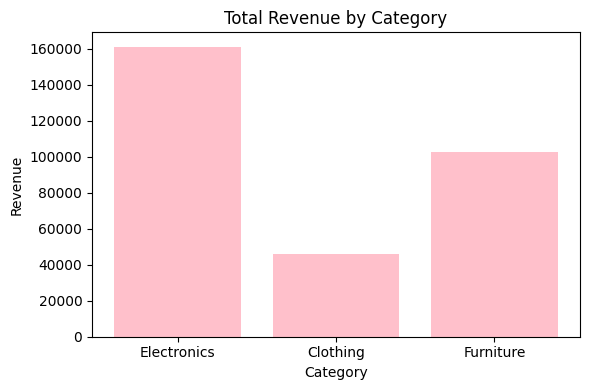

In [26]:
from pyspark.sql.functions import sum as _sum, col
import matplotlib.pyplot as plt

category_rev = df.groupBy("category").agg(_sum("revenue").alias("total_revenue"))
pdf = category_rev.toPandas()

plt.figure(figsize=(6,4))
plt.bar(pdf["category"], pdf["total_revenue"], color="pink")
plt.title("Total Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("/content/bar_revenue_by_category.png")
plt.show()

**4. Create a line chart showing revenue trend by order_date (sorted by date).**

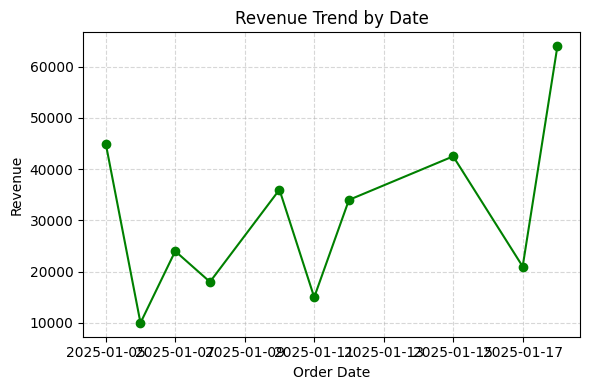

In [27]:
date_rev = df.groupBy("order_date").agg(_sum("revenue").alias("total_revenue")).orderBy("order_date")
pdf = date_rev.toPandas()

plt.figure(figsize=(6,4))
plt.plot(pdf["order_date"], pdf["total_revenue"], marker='o', color="green")
plt.title("Revenue Trend by Date")
plt.xlabel("Order Date")
plt.ylabel("Revenue")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("/content/line_revenue_trend.png")
plt.show()


**5. Create a pie chart showing percentage contribution of each region to total revenue.**

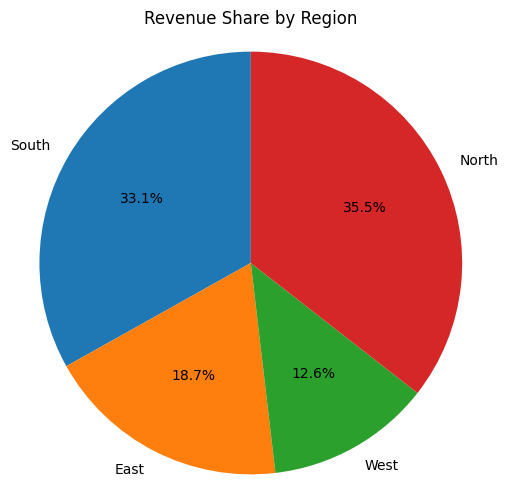

In [28]:
region_rev = df.groupBy("region").agg(_sum("revenue").alias("total_revenue"))
pdf = region_rev.toPandas()

plt.figure(figsize=(6,6))
plt.pie(pdf["total_revenue"], labels=pdf["region"], autopct="%1.1f%%", startangle=90)
plt.title("Revenue Share by Region")
plt.axis("equal")
plt.savefig("/content/pie_region_revenue.png")
plt.show()

**6. Create a stacked bar chart comparing total quantity sold per category by region.**

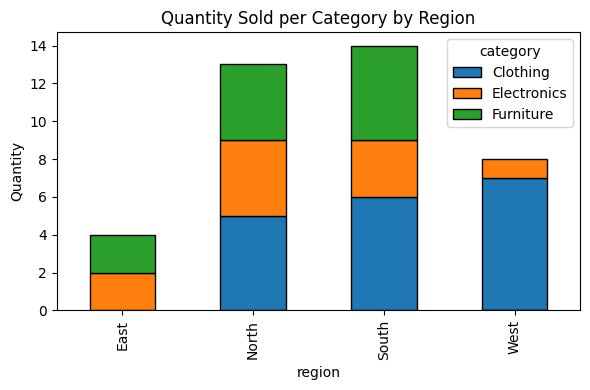

In [29]:
stack_df = df.groupBy("region", "category").agg(_sum("quantity").alias("total_quantity"))
pdf = stack_df.toPandas().pivot(index="region", columns="category", values="total_quantity").fillna(0)

pdf.plot(kind="bar", stacked=True, figsize=(6,4), edgecolor="black")
plt.title("Quantity Sold per Category by Region")
plt.ylabel("Quantity")
plt.tight_layout()
plt.savefig("/content/stacked_quantity_category_region.png")
plt.show()

**7. Filter and visualize only top 5 products by total revenue in a horizontal bar chart.**

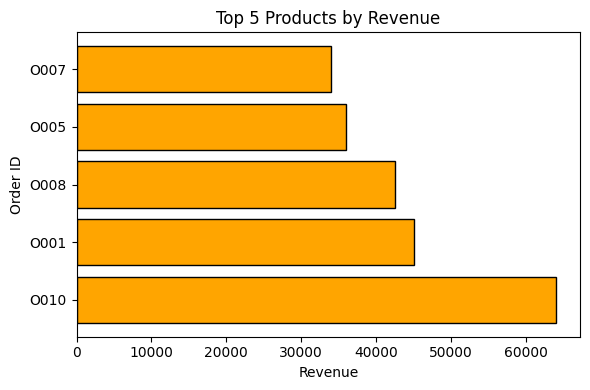

In [30]:
top_products = df.withColumn("product_revenue", col("revenue")).orderBy(col("product_revenue").desc()).limit(5)
pdf = top_products.toPandas()

plt.figure(figsize=(6,4))
plt.barh(pdf["order_id"], pdf["product_revenue"], color="orange", edgecolor="black")
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Order ID")
plt.tight_layout()
plt.savefig("/content/top5_products.png")
plt.show()

**8. Create a scatter plot showing quantity vs price colored by category .**

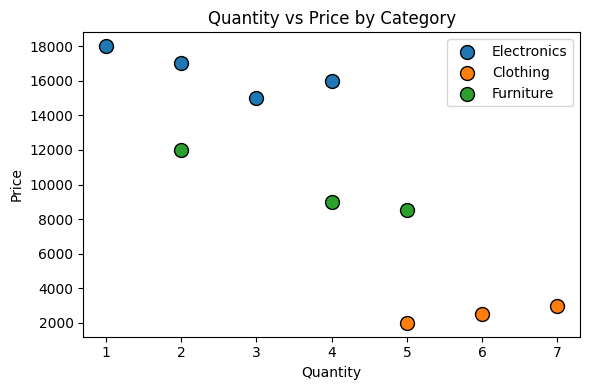

In [31]:
pdf = df.toPandas()
categories = pdf["category"].unique()
colors = plt.cm.tab10.colors

plt.figure(figsize=(6,4))
for i, cat in enumerate(categories):
    subset = pdf[pdf["category"] == cat]
    plt.scatter(subset["quantity"], subset["price"], color=colors[i], label=cat, s=100, edgecolor="black")

plt.title("Quantity vs Price by Category")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.savefig("/content/scatter_quantity_price.png")
plt.show()

**9. Find average order value by region and plot it as a bar chart.**

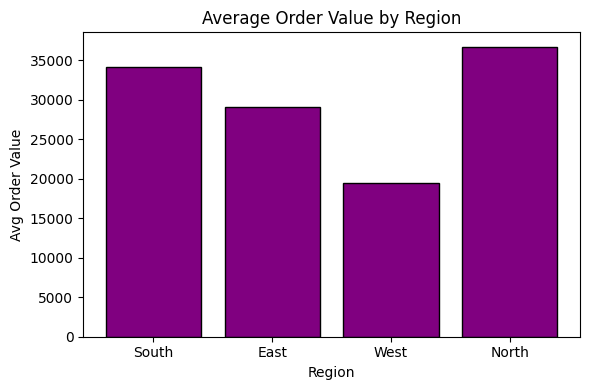

In [32]:
from pyspark.sql.functions import avg

avg_order_val = df.groupBy("region").agg(avg("revenue").alias("avg_order_value"))
pdf = avg_order_val.toPandas()

plt.figure(figsize=(6,4))
plt.bar(pdf["region"], pdf["avg_order_value"], color="purple", edgecolor="black")
plt.title("Average Order Value by Region")
plt.xlabel("Region")
plt.ylabel("Avg Order Value")
plt.tight_layout()
plt.savefig("/content/bar_avg_order_value.png")
plt.show()

**10. Create a heatmap (pivot table in Databricks) showing revenue by region and category.**

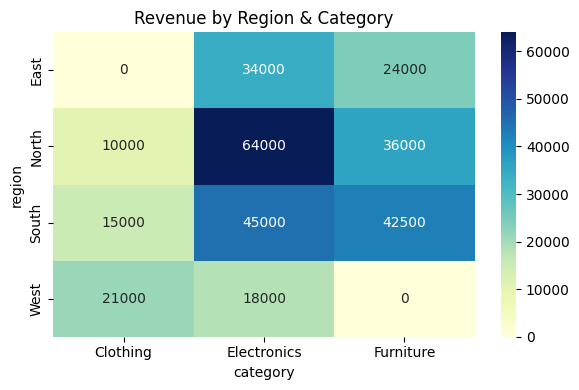

In [33]:
heat_df = df.groupBy("region", "category").agg(_sum("revenue").alias("total_revenue"))
pdf = heat_df.toPandas().pivot(index="region", columns="category", values="total_revenue").fillna(0)

import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(pdf, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Revenue by Region & Category")
plt.tight_layout()
plt.savefig("/content/heatmap_region_category.png")
plt.show()

**11. Bonus: Apply a discount column:**

**Electronics → 10% discount**

**Clothing → 5% discount**

**Furniture → 8% discount**

Plot discounted vs original revenue for each category in a grouped bar chart.

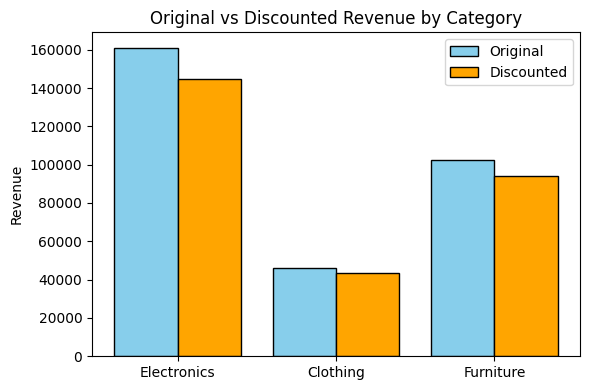

In [34]:
from pyspark.sql.functions import when

df = df.withColumn(
    "discounted_revenue",
    when(col("category") == "Electronics", col("revenue") * (1 - 0.10))
    .when(col("category") == "Clothing", col("revenue") * (1 - 0.05))
    .when(col("category") == "Furniture", col("revenue") * (1 - 0.08))
    .otherwise(col("revenue"))
)

discount_df = df.groupBy("category").agg(
    _sum("revenue").alias("original_revenue"),
    _sum("discounted_revenue").alias("discounted_revenue")
)
pdf = discount_df.toPandas()

import numpy as np
x = np.arange(len(pdf))
plt.figure(figsize=(6,4))
plt.bar(x - 0.2, pdf["original_revenue"], width=0.4, label="Original", color="skyblue", edgecolor="black")
plt.bar(x + 0.2, pdf["discounted_revenue"], width=0.4, label="Discounted", color="orange", edgecolor="black")
plt.xticks(x, pdf["category"])
plt.title("Original vs Discounted Revenue by Category")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.savefig("/content/grouped_discount.png")
plt.show()


**12. Save all visualizations as PNG files to /dbfs/FileStore/tables sales_viz/ .**

In [35]:
print("All the pictures were saved as png format")

All the pictures were saved as png format
